In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [5]:
# Define a dictionary for the expected dtypes of the columns
dtypes = {
    "year": int,
    "country": str,
    "doc_number": str  # Treat doc_number as a string initially to avoid mixed type issues
}

# Load CSV files with specified dtypes
csv_files = glob.glob("../../raw_data/scrape_data/patents_foster_*.csv")
dfs = [pd.read_csv(file, dtype=dtypes) for file in csv_files]
df_all = pd.concat(dfs, ignore_index=True)

print(f"Loaded {len(df_all)} rows from {len(csv_files)} files.")

# Remove non-numeric values (keep only rows where doc_number is digits)
df_all = df_all[df_all["doc_number"].astype(str).str.isdigit()]

# Convert year and doc_number to integers
df_all["year"] = df_all["year"].astype(int)
df_all["doc_number"] = df_all["doc_number"].astype(int)

Loaded 1664741 rows from 7 files.


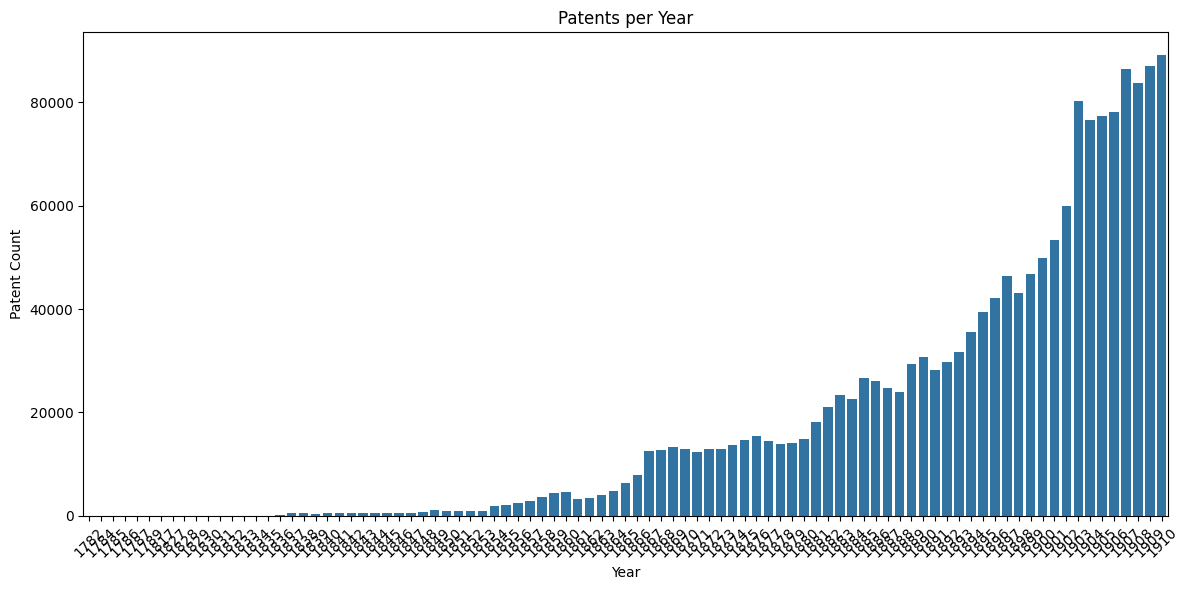

In [6]:
patents_per_year = df_all.groupby("year")["doc_number"].count().reset_index(name="patent_count")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="patent_count", data=patents_per_year)
plt.title("Patents per Year")
plt.xlabel("Year")
plt.ylabel("Patent Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




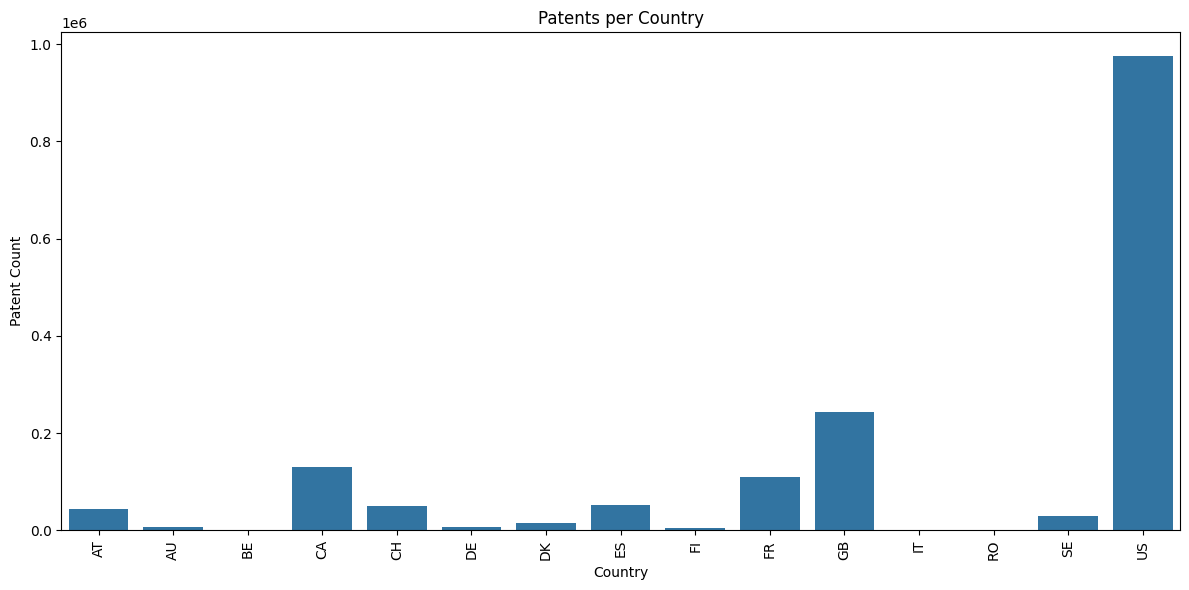

In [7]:
# Count patents per country
patents_per_country = df_all.groupby("country")["doc_number"].count().reset_index(name="patent_count")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="country", y="patent_count", data=patents_per_country)
plt.title("Patents per Country")
plt.xlabel("Country")
plt.ylabel("Patent Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

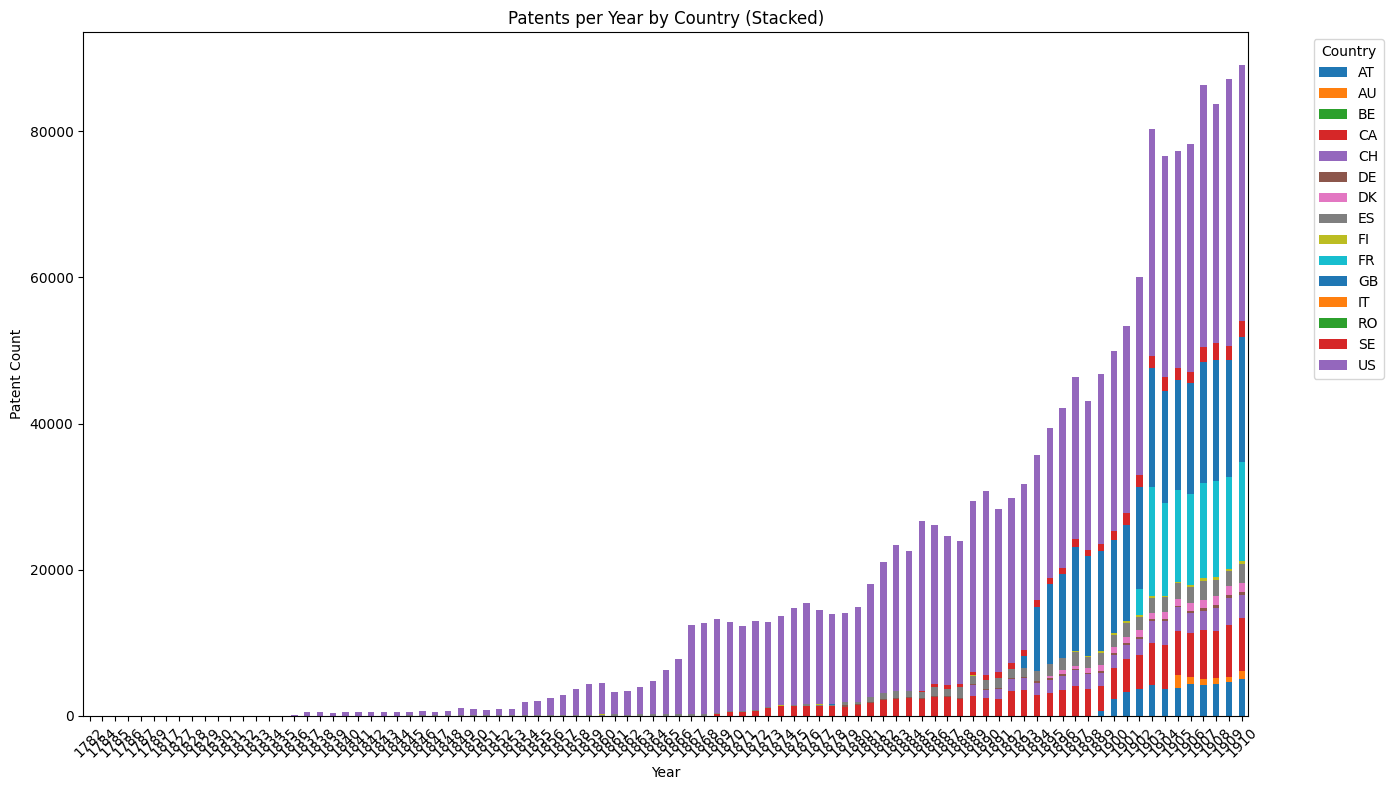

In [ ]:
# Pivot the data for stacked bar chart
patents_by_year_country = df_all.groupby(["year", "country"])["doc_number"].count().reset_index(name="patent_count")
patents_pivot = patents_by_year_country.pivot(index="year", columns="country", values="patent_count").fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
patents_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Patents per Year by Country (Stacked)")
plt.xlabel("Year")
plt.ylabel("Patent Count")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
